## Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [ ]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cds_rl_2022` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/cds_rl_2022'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
    !mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/cds_rl_2022'
if not os.path.exists(SYM_PATH):
    !ln -s $DRIVE_PATH $SYM_PATH

In [ ]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        git-lfs \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg

# set up git lfs
!git lfs install

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,990 kB]
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86

In [ ]:
#@title install mujoco-py

%pip install free-mujoco-py

# Cythonizes pkg on the first run
import mujoco_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.1 MB 9.5 MB/s 
     |████████████████████████████████| 203 kB 67.7 MB/s 
     |████████████████████████████████| 3.4 MB 39.3 MB/s 
     |████████████████████████████████| 3.1 MB 37.2 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local/lib
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuexten

### Clone/update repo

Now we need to clone the HW2 codebase. There are two options:

1. Git clone the [repository](https://github.com/pkuderov/mipt-rl-hw-2022.git), install requirements, start coding HW2. This's the only option if you haven't cloned the repo yet for HW1. 
    If you have the repo already cloned, it's better to follow the 2-nd option. Otherwise, you will need to move the old `rl_hw` folder first. But don't delete it - make sure you've kept the HW1 solution as you will need it for this assignment!

2. Use already cloned local repository in `rl_hw`. Save the HW1 solution to the separate branch, then git pull changes from the remote upstream to get HW2 codebase.

In [ ]:
#@title clone homework repo (option #1)

#%cd $SYM_PATH
#!git clone https://github.com/pkuderov/mipt-rl-hw-2022.git rl_hw
#%cd rl_hw

In [ ]:
#@title pull updated repo (option #2)
# Don't hesitate to update the script for yourself

%cd $SYM_PATH/rl_hw
# git commit before pulling
!git checkout -b "hw1"
!git add .
!git commit -m "HW1 solution"
!git checkout main

# update
!git pull

/content/gdrive/My Drive/cds_rl_2022/rl_hw
fatal: A branch named 'hw1' already exists.

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@b7d960ad0869.(none)')
M	.gitattributes
M	hw1/cds_rl/infrastructure/pytorch_util.py
M	hw1/cds_rl/infrastructure/replay_buffer.py
M	hw1/cds_rl/infrastructure/rl_trainer.py
M	hw1/cds_rl/infrastructure/utils.py
M	hw1/cds_rl/policies/MLP_policy.py
M	hw1/cds_rl/policies/loaded_gaussian_policy.py
M	hw1/scripts/install_mujoco_mac_m1.sh
M	hw2/hw2/agents/pg_agent.py
M	hw2/hw2/infrastructure/rl_trainer.py
M	hw2/hw2/infrastructure/utils.py
M	hw2/hw2/policies/MLP_policy.py
Already on 'main'
Your branch is up to date with 'origin/main'.
fatal: cannot exec '.git/hooks/post-checkout': Permission denied
Already up to date.


In [ ]:
#@title install requirements (from HW1 as HW2 has them the same)
%cd hw1
%pip install -r requirements.colab.txt
%pip install -e .

# also install hw2 package
%cd ../hw2
%pip install -e .

/content/gdrive/My Drive/cds_rl_2022/rl_hw/hw1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 13.3 MB/s 
     |████████████████████████████████| 448 kB 64.5 MB/s 
     |████████████████████████████████| 793 kB 48.3 MB/s 
     |████████████████████████████████| 793 kB 62.9 MB/s 
     |████████████████████████████████| 793 kB 60.5 MB/s 
     |████████████████████████████████| 792 kB 61.4 MB/s 
     |████████████████████████████████| 792 kB 70.2 MB/s 
     |████████████████████████████████| 791 kB 58.1 MB/s 
     |████████████████████████████████| 790 kB 59.1 MB/s 
     |████████████████████████████████| 788 kB 47.1 MB/s 
     |████████████████████████████████| 787 kB 63.3 MB/s 
     |████████████████████████████████| 786 kB 63.0 MB/s 
     |████████████████████████████████| 786 kB 31.7 MB/s 
     |████████████████████████████████| 785 kB 19.8 MB/s 
     |████████████████████████████████| 78

In [ ]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import gym
import matplotlib
matplotlib.use('Agg')
from hw2.infrastructure.colab_utils import (
    wrap_env,
    show_video
)

env = wrap_env(gym.make("Ant-v2"))

observation = env.reset()
for i in range(100):
    env.render(mode='rgb_array')
    obs, rew, term, _ = env.step(env.action_space.sample() ) 
    if term:
        break;
            
env.close()
print('Loading video...')
show_video()

Loading video...


## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`cds_rl_2022/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

## Run Policy Gradients

In [19]:
#@title imports

import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

from hw2.infrastructure.rl_trainer import RL_Trainer
from hw2.agents.pg_agent import PGAgent

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#@title runtime arguments

class Args:

    def __getitem__(self, key):
        return getattr(self, key)

    def __setitem__(self, key, val):
        setattr(self, key, val)

    def __contains__(self, key):
        return hasattr(self, key)

    def create_logdir(self, prefix = 'data'):
      data_path = '/content/cds_rl_2022/hw2/' + prefix

      if not (os.path.exists(data_path)):
          os.makedirs(data_path)

      logdir = args.exp_name + '_' + args.env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
      logdir = os.path.join(data_path, logdir)
      args['logdir'] = logdir
      if not(os.path.exists(logdir)):
          os.makedirs(logdir)

    env_name = 'CartPole-v0' #@param
    exp_name = 'q1_sb_rtg_na' #@param

    #@markdown main parameters of interest
    n_iter = 100 #@param {type: "integer"}

    ## PDF will tell you how to set ep_len
    ## and discount for each environment
    ep_len = 200 #@param {type: "integer"}
    discount = 0.95 #@param {type: "number"}

    reward_to_go = False #@param {type: "boolean"}
    nn_baseline = False #@param {type: "boolean"}
    gae_lambda = None #@param {type: "number"}
    dont_standardize_advantages = False #@param {type: "boolean"}

    #@markdown batches and steps
    batch_size = 1000 #@param {type: "integer"}
    train_batch_size = batch_size
    eval_batch_size = 400 #@param {type: "integer"}

    num_agent_train_steps_per_iter = 1 #@param {type: "integer"}
    learning_rate =  5e-3 #@param {type: "number"}

    #@markdown MLP parameters
    n_layers = 2 #@param {type: "integer"}
    size = 64 #@param {type: "integer"}

    #@markdown system
    save_params = False #@param {type: "boolean"}
    no_gpu = False #@param {type: "boolean"}
    which_gpu = 0 #@param {type: "integer"}
    seed = 1 #@param {type: "integer"}

    action_noise_std = 0 #@param {type: "number"}

    #@markdown logging
    ## default is to not log video so
    ## that logs are small enough to be
    ## uploaded to gradscope
    video_log_freq =  -1#@param {type: "integer"}
    scalar_log_freq =  1#@param {type: "integer"}

In [ ]:
## define policy gradient trainer

class PG_Trainer(object):
    def __init__(self, params):

        #####################
        ## SET AGENT PARAMS
        #####################

        computation_graph_args = {
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            }

        estimate_advantage_args = {
            'gamma': params['discount'],
            'standardize_advantages': not(params['dont_standardize_advantages']),
            'reward_to_go': params['reward_to_go'],
            'nn_baseline': params['nn_baseline'],
            'gae_lambda': params['gae_lambda'],
        }

        train_args = {
            'num_agent_train_steps_per_iter': params['num_agent_train_steps_per_iter'],
        }

        agent_params = {**computation_graph_args, **estimate_advantage_args, **train_args}

        self.params = params
        self.params['agent_class'] = PGAgent
        self.params['agent_params'] = agent_params
        self.params['batch_size_initial'] = self.params['batch_size']

        ################
        ## RL TRAINER
        ################

        self.rl_trainer = RL_Trainer(self.params)

    def run_training_loop(self):
        self.rl_trainer.run_training_loop(
            self.params['n_iter'],
            collect_policy = self.rl_trainer.agent.actor,
            eval_policy = self.rl_trainer.agent.actor,
        )

In [ ]:
from tensorflow.python.summary.summary_iterator import summary_iterator
def read_logs(filename, tag):
    info_tag = []
    for e in summary_iterator(filename):
        for v in e.summary.value:
            if v.tag == tag:
                info_tag.append(v.simple_value)
    return info_tag

## Experiment 1: CartPole

In [ ]:
#    --env_name CartPole-v0 -n 100 -b 1000 \
#    -dsa --exp_name q1_sb_no_rtg_dsa

args = Args()
args.env_name = 'CartPole-v0'
args.n_iter = 100
args.batch_size = 1000
args.dont_standardize_advantages = True
args.reward_to_go = False
args.exp_name = 'q1_sb_no_rtg_dsa'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/run_logs/q1_sb_no_rtg_dsa_CartPole-v0_28-05-2022_09-15-24
########################
GPU not detected. Defaulting to CPU.


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 30.0
Eval_StdReturn : 19.42506980895996
Eval_MaxReturn : 79.0
Eval_MinReturn : 11.0
Eval_AverageEpLen : 30.0
Train_AverageReturn : 23.204545974731445
Train_StdReturn : 13.100276947021484
Train_MaxReturn : 63.0
Train_MinReturn : 9.0
Train_AverageEpLen : 23.204545454545453
Train_EnvstepsSoFar : 1021
TimeSinceStart : 0.5299477577209473
Training Loss : 10112.4580078125
Initial_DataCollection_AverageReturn : 23.204545974731445
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 25.25
Eval_StdReturn : 9.522998809814453
Eval_MaxReturn : 46.0
Eva

In [ ]:
#     --env_name CartPole-v0 -n 100 -b 1000 \
#     -rtg -dsa --exp_name q1_sb_rtg_dsa

args = Args()
args.env_name = 'CartPole-v0'
args.n_iter = 100
args.batch_size = 1000
args.dont_standardize_advantages = True
args.reward_to_go = True
args.exp_name = 'q1_sb_rtg_dsa'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/run_logs/q1_sb_rtg_dsa_CartPole-v0_28-05-2022_09-16-18
########################
GPU not detected. Defaulting to CPU.


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 38.91666793823242
Eval_StdReturn : 23.54236602783203
Eval_MaxReturn : 109.0
Eval_MinReturn : 22.0
Eval_AverageEpLen : 38.916666666666664
Train_AverageReturn : 23.204545974731445
Train_StdReturn : 13.100276947021484
Train_MaxReturn : 63.0
Train_MinReturn : 9.0
Train_AverageEpLen : 23.204545454545453
Train_EnvstepsSoFar : 1021
TimeSinceStart : 0.5390372276306152
Training Loss : 6606.3349609375
Initial_DataCollection_AverageReturn : 23.204545974731445
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 37.230770111083984
Eval_StdReturn : 29.041

In [ ]:
#    --env_name CartPole-v0 -n 100 -b 1000 \
#    -rtg --exp_name q1_sb_rtg_na

args = Args()
args.env_name = 'CartPole-v0'
args.n_iter = 100
args.batch_size = 1000
args.dont_standardize_advantages = False
args.reward_to_go = True
args.exp_name = 'q1_sb_rtg_na'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/run_logs/q1_sb_rtg_na_CartPole-v0_28-05-2022_09-17-15
########################
GPU not detected. Defaulting to CPU.


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 32.30769348144531
Eval_StdReturn : 17.017568588256836
Eval_MaxReturn : 73.0
Eval_MinReturn : 14.0
Eval_AverageEpLen : 32.30769230769231
Train_AverageReturn : 23.204545974731445
Train_StdReturn : 13.100276947021484
Train_MaxReturn : 63.0
Train_MinReturn : 9.0
Train_AverageEpLen : 23.204545454545453
Train_EnvstepsSoFar : 1021
TimeSinceStart : 0.5360662937164307
Training Loss : -4.158954620361328
Initial_DataCollection_AverageReturn : 23.204545974731445
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 36.6363639831543
Eval_StdReturn : 31.3811

In [ ]:
#    --env_name CartPole-v0 -n 100 -b 5000 \
#    -dsa --exp_name q1_lb_no_rtg_dsa

args = Args()
args.env_name = 'CartPole-v0'
args.n_iter = 100
args.batch_size = 5000
args.dont_standardize_advantages = True
args.reward_to_go = False
args.exp_name = 'q1_lb_no_rtg_dsa'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/run_logs/q1_lb_no_rtg_dsa_CartPole-v0_28-05-2022_09-18-11
########################
GPU not detected. Defaulting to CPU.


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 25.47058868408203
Eval_StdReturn : 13.110918998718262
Eval_MaxReturn : 65.0
Eval_MinReturn : 12.0
Eval_AverageEpLen : 25.470588235294116
Train_AverageReturn : 25.33668327331543
Train_StdReturn : 15.415263175964355
Train_MaxReturn : 118.0
Train_MinReturn : 9.0
Train_AverageEpLen : 25.33668341708543
Train_EnvstepsSoFar : 5042
TimeSinceStart : 1.8459844589233398
Training Loss : 10284.2568359375
Initial_DataCollection_AverageReturn : 25.33668327331543
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 37.90909194946289
Eval_StdReturn : 16.76

In [ ]:
#    --env_name CartPole-v0 -n 100 -b 5000 \
#    -rtg -dsa --exp_name q1_lb_rtg_dsa

args = Args()
args.env_name = 'CartPole-v0'
args.n_iter = 100
args.batch_size = 5000
args.dont_standardize_advantages = True
args.reward_to_go = True
args.exp_name = 'q1_lb_rtg_dsa'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/run_logs/q1_lb_rtg_dsa_CartPole-v0_28-05-2022_09-21-16
########################
GPU not detected. Defaulting to CPU.


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 36.38461685180664
Eval_StdReturn : 22.31777000427246
Eval_MaxReturn : 101.0
Eval_MinReturn : 12.0
Eval_AverageEpLen : 36.38461538461539
Train_AverageReturn : 25.33668327331543
Train_StdReturn : 15.415263175964355
Train_MaxReturn : 118.0
Train_MinReturn : 9.0
Train_AverageEpLen : 25.33668341708543
Train_EnvstepsSoFar : 5042
TimeSinceStart : 2.008275032043457
Training Loss : 6655.55908203125
Initial_DataCollection_AverageReturn : 25.33668327331543
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 39.45454406738281
Eval_StdReturn : 15.7270097

In [ ]:
#    --env_name CartPole-v0 -n 100 -b 5000 \
#    -rtg --exp_name q1_lb_rtg_na

args = Args()
args.env_name = 'CartPole-v0'
args.n_iter = 100
args.batch_size = 5000
args.dont_standardize_advantages = False
args.reward_to_go = True
args.exp_name = 'q1_lb_rtg_na'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/run_logs/q1_lb_rtg_na_CartPole-v0_28-05-2022_09-24-25
########################
GPU not detected. Defaulting to CPU.


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 34.5
Eval_StdReturn : 22.6329402923584
Eval_MaxReturn : 82.0
Eval_MinReturn : 10.0
Eval_AverageEpLen : 34.5
Train_AverageReturn : 25.33668327331543
Train_StdReturn : 15.415263175964355
Train_MaxReturn : 118.0
Train_MinReturn : 9.0
Train_AverageEpLen : 25.33668341708543
Train_EnvstepsSoFar : 5042
TimeSinceStart : 1.91801118850708
Training Loss : -4.895714282989502
Initial_DataCollection_AverageReturn : 25.33668327331543
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 39.272727966308594
Eval_StdReturn : 9.95527172088623
Eval_MaxReturn : 65.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


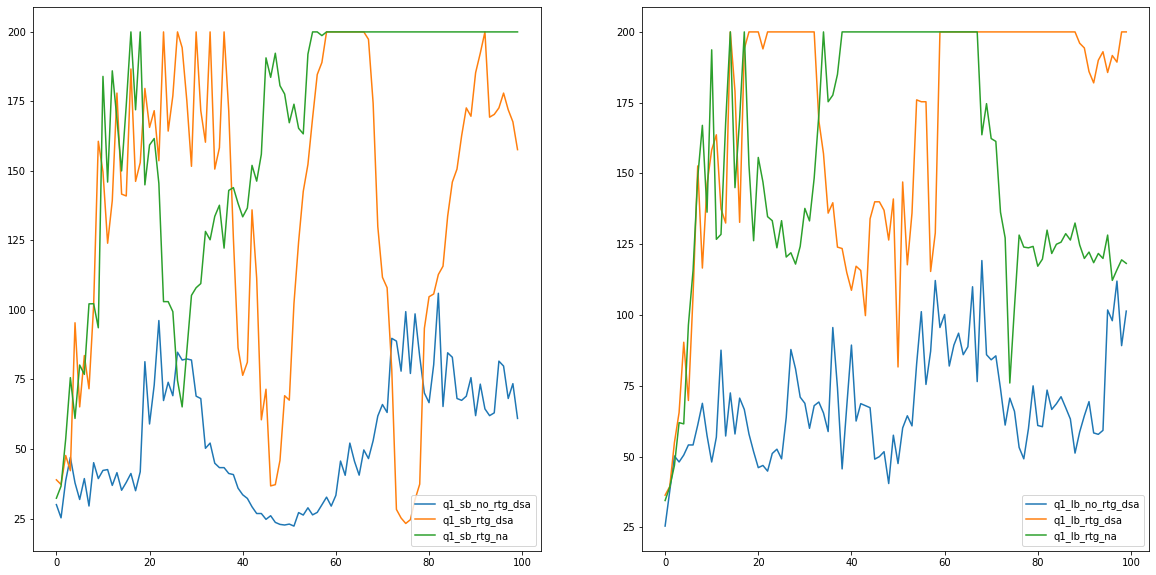

In [50]:
logs_sb = [ '/content/cds_rl_2022/hw2/run_logs/q1_sb_no_rtg_dsa_CartPole-v0_28-05-2022_09-15-24/events.out.tfevents.1653729324.e3b73a40a3ed',
            '/content/cds_rl_2022/hw2/run_logs/q1_sb_rtg_dsa_CartPole-v0_28-05-2022_09-16-18/events.out.tfevents.1653729378.e3b73a40a3ed',
            '/content/cds_rl_2022/hw2/run_logs/q1_sb_rtg_na_CartPole-v0_28-05-2022_09-17-15/events.out.tfevents.1653729435.e3b73a40a3ed'
]
labels_sb = ['q1_sb_no_rtg_dsa', 'q1_sb_rtg_dsa', 'q1_sb_rtg_na']

logs_lb = [ '/content/cds_rl_2022/hw2/run_logs/q1_lb_no_rtg_dsa_CartPole-v0_28-05-2022_09-18-11/events.out.tfevents.1653729491.e3b73a40a3ed',
            '/content/cds_rl_2022/hw2/run_logs/q1_lb_rtg_dsa_CartPole-v0_28-05-2022_09-21-16/events.out.tfevents.1653729676.e3b73a40a3ed',
            '/content/cds_rl_2022/hw2/run_logs/q1_lb_rtg_na_CartPole-v0_28-05-2022_09-24-25/events.out.tfevents.1653729865.e3b73a40a3ed'
]
labels_lb = ['q1_lb_no_rtg_dsa', 'q1_lb_rtg_dsa', 'q1_lb_rtg_na']

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
for i in range(len(labels_sb)):
  plt.plot(read_logs(logs_sb[i], 'Eval_AverageReturn'), label = labels_sb[i])
plt.legend()

plt.subplot(1, 2, 2)
for i in range(len(labels_lb)):
  plt.plot(read_logs(logs_lb[i], 'Eval_AverageReturn'), label = labels_lb[i])
plt.legend()
plt.show()

### Выводы:
- Лучший результат показывает "reward-to-go" способ оценки отдачи
- Нормализация помогает улучшить качество обучения
- Больший размер батчаприводит к более раннему достижению хорошего результата


## Experiment 2: InvertedPendulum

In [ ]:
#    --env_name InvertedPendulum-v2 \
#    --ep_len 1000 --discount 0.9 -n 100 -l 2 -s 64 \
#    -b <b*> -lr <r*> -rtg \
#    --exp_name q2_b<b*>_r<r*>


args = Args()
args.env_name = 'InvertedPendulum-v2'
args.ep_len = 1000
args.discount = 0.9
args.n_iter = 100
args.n_layers = 2
args.size = 64
args.reward_to_go = True
args.dont_standardize_advantages = False


batches = [1000, 2500, 5000]
lrates = [5e-3, 1e-2, 5e-2]

for b in batches:
  for lr in lrates:
    args.learning_rate = lr
    args.batch_size = b
    args.exp_name = 'q2_b' + str(b) + '_r' + str(lr)
    args.create_logdir('run_logs')

    trainer = PG_Trainer(args)
    trainer.run_training_loop()

Выходные данные были обрезаны до нескольких последних строк (5000).
Train_AverageReturn : 91.23636627197266
Train_StdReturn : 41.78645324707031
Train_MaxReturn : 325.0
Train_MinReturn : 39.0
Train_AverageEpLen : 91.23636363636363
Train_EnvstepsSoFar : 110710
TimeSinceStart : 74.07361316680908
Training Loss : -25.974260330200195
Initial_DataCollection_AverageReturn : 8.429292678833008
Done logging...




********** Iteration 22 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 107.0
Eval_StdReturn : 57.54563522338867
Eval_MaxReturn : 190.0
Eval_MinReturn : 33.0
Eval_AverageEpLen : 107.0
Train_AverageReturn : 78.06153869628906
Train_StdReturn : 26.88315200805664
Train_MaxReturn : 177.0
Train_MinReturn : 15.0
Train_AverageEpLen : 78.06153846153846
Train_EnvstepsSoFar : 115784
TimeSinceStart : 77.40286540985107
Training Loss : -25.52412986755371
Initial_DataCollection_AverageReturn : 8.429292678833008
Done logging..

In [18]:
# %cd $SYM_PATH
# %cd hw2/run_logs

matplotlib.use('TkAgg')

logs = [
      '/content/cds_rl_2022/hw2/run_logs/q2_b1000_r0.005_InvertedPendulum-v2_28-05-2022_10-25-58/events.out.tfevents.1653733558.e3b73a40a3ed',
      '/content/cds_rl_2022/hw2/run_logs/q2_b1000_r0.01_InvertedPendulum-v2_28-05-2022_10-27-41/events.out.tfevents.1653733661.e3b73a40a3ed',
      '/content/cds_rl_2022/hw2/run_logs/q2_b1000_r0.05_InvertedPendulum-v2_28-05-2022_10-29-29/events.out.tfevents.1653733769.e3b73a40a3ed',
      '/content/cds_rl_2022/hw2/run_logs/q2_b2500_r0.005_InvertedPendulum-v2_28-05-2022_10-31-22/events.out.tfevents.1653733882.e3b73a40a3ed',
      '/content/cds_rl_2022/hw2/run_logs/q2_b2500_r0.01_InvertedPendulum-v2_28-05-2022_10-34-36/events.out.tfevents.1653734076.e3b73a40a3ed',
      '/content/cds_rl_2022/hw2/run_logs/q2_b2500_r0.05_InvertedPendulum-v2_28-05-2022_10-37-52/events.out.tfevents.1653734272.e3b73a40a3ed',
      '/content/cds_rl_2022/hw2/run_logs/q2_b5000_r0.005_InvertedPendulum-v2_28-05-2022_10-41-20/events.out.tfevents.1653734480.e3b73a40a3ed',
      '/content/cds_rl_2022/hw2/run_logs/q2_b5000_r0.01_InvertedPendulum-v2_28-05-2022_10-47-06/events.out.tfevents.1653734826.e3b73a40a3ed',
      '/content/cds_rl_2022/hw2/run_logs/q2_b5000_r0.05_InvertedPendulum-v2_28-05-2022_10-52-51/events.out.tfevents.1653735171.e3b73a40a3ed'
]

returns = []
for log in logs:
    returns.append(read_logs(log, 'Eval_AverageReturn'))

plt.figure(figsize = (10,8))

batches = [1000, 2500, 5000]
lrates = [5e-3, 1e-2, 5e-2]
for i in range(len(returns)):
  plt.plot(returns[i], label = 'q2_b' + str(batches[int(i/3)]) + '_r' + str(lrates[i%3]))

plt.legend()
plt.show()

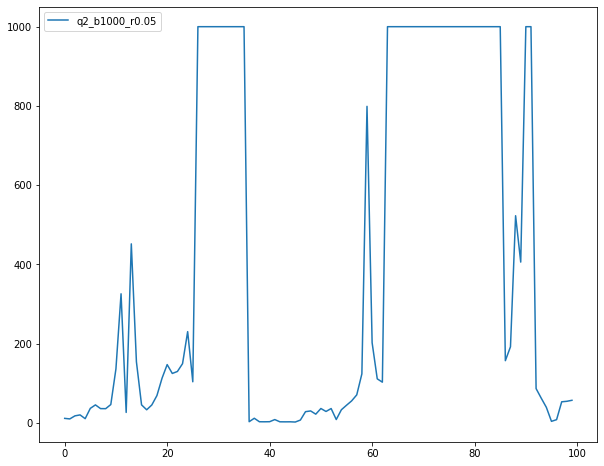

In [ ]:
plt.figure(figsize = (10,8))
filter = [2]
for i in range(len(returns)):
  if i in filter:
    plt.plot(returns[i], label = 'q2_b' + str(batches[int(i/3)]) + '_r' + str(lrates[i%3]))

plt.legend()
plt.show()

Лучший результат был с batch_size = 1000 и learning_rate = 0.05

## Experiment 3: LunarLander

In [ ]:
#    --env_name LunarLanderContinuous-v2 --ep_len 1000 \
#    --discount 0.99 -n 100 -l 2 -s 64 -b 40000 -lr 0.005 \
#    --reward_to_go --nn_baseline --exp_name q3_b40000_r0.005


args = Args()
args.env_name = 'LunarLanderContinuous-v2'
args.ep_len = 1000
args.discount = 0.99
args.n_iter = 100
args.n_layers = 2
args.size = 64
args.batch_size = 40000
args.learning_rate = 0.005
args.reward_to_go = True
args.nn_baseline = True
args.dont_standardize_advantages = False
args.exp_name = 'q3_b40000_r0.005'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/test/q3_b40000_r0.005_LunarLanderContinuous-v2_28-05-2022_14-22-05
########################
Using GPU id 0


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -527.5029907226562
Eval_StdReturn : 99.56351470947266
Eval_MaxReturn : -402.1078796386719
Eval_MinReturn : -645.665771484375
Eval_AverageEpLen : 146.33333333333334
Train_AverageReturn : -317.36053466796875
Train_StdReturn : 160.43321228027344
Train_MaxReturn : -16.783233642578125
Train_MinReturn : -719.3893432617188
Train_AverageEpLen : 106.46684350132627
Train_EnvstepsSoFar : 40138
TimeSinceStart : 46.958783864974976
Training Loss : 16.025291442871094
Initial_DataCollection_AverageReturn : -317.36053466796875
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_Avera

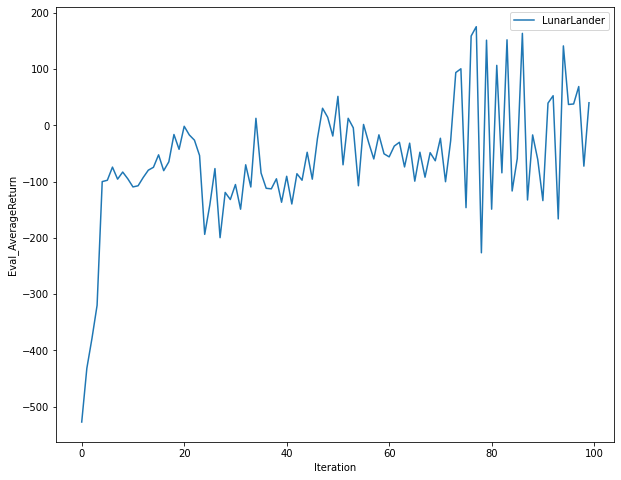

In [ ]:
log = '/content/cds_rl_2022/hw2/run_logs/q3_b40000_r0.005_LunarLanderContinuous-v2_28-05-2022_14-22-05/events.out.tfevents.1653747725.64068df12a78'
returns = read_logs(log, 'Eval_AverageReturn')
fig = plt.figure(figsize = (10,8))
plt.plot(returns, label = 'LunarLander')
plt.xlabel('Iteration')
plt.ylabel('Eval_AverageReturn')
plt.legend()
plt.show()

## Experiment 4: HalfCheetah

In [ ]:
#   --env_name HalfCheetah-v2 --ep_len 150 \
#   --discount 0.95 -n 100 -l 2 -s 32 \
#    -b <b> -lr <r> -rtg --nn_baseline \
#    --exp_name q4_search_b<b>_lr<r>_rtg_nnbaseline


args = Args()
args.env_name = 'HalfCheetah-v2'
args.ep_len = 150
args.discount = 0.95
args.n_iter = 100
args.n_layers = 2
args.size = 32
args.reward_to_go = True
args.nn_baseline = True
args.dont_standardize_advantages = False


batches = [10000, 30000, 50000]
lrates = [5e-3, 1e-2, 2e-2]

for b in batches:
  for lr in lrates:
    args.learning_rate = lr
    args.batch_size = b
    args.exp_name = 'q4_search_b' + str(b) + '_lr' + str(lr) + '_rtg_nnbaseline'
    args.create_logdir('run_logs')

    trainer = PG_Trainer(args)
    trainer.run_training_loop()

Выходные данные были обрезаны до нескольких последних строк (5000).
Train_AverageReturn : -71.15361785888672
Train_StdReturn : 26.051700592041016
Train_MaxReturn : -11.131241798400879
Train_MinReturn : -164.09652709960938
Train_AverageEpLen : 150.0
Train_EnvstepsSoFar : 1102200
TimeSinceStart : 618.2669100761414
Training Loss : -46.271636962890625
Initial_DataCollection_AverageReturn : -97.50374603271484
Done logging...




********** Iteration 22 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -106.10028839111328
Eval_StdReturn : 45.26728439331055
Eval_MaxReturn : -44.50059509277344
Eval_MinReturn : -151.99313354492188
Eval_AverageEpLen : 150.0
Train_AverageReturn : -73.51107788085938
Train_StdReturn : 28.83208656311035
Train_MaxReturn : 10.436271667480469
Train_MinReturn : -225.9603271484375
Train_AverageEpLen : 150.0
Train_EnvstepsSoFar : 1152300
TimeSinceStart : 645.8744401931763
Training Loss : -85.016075

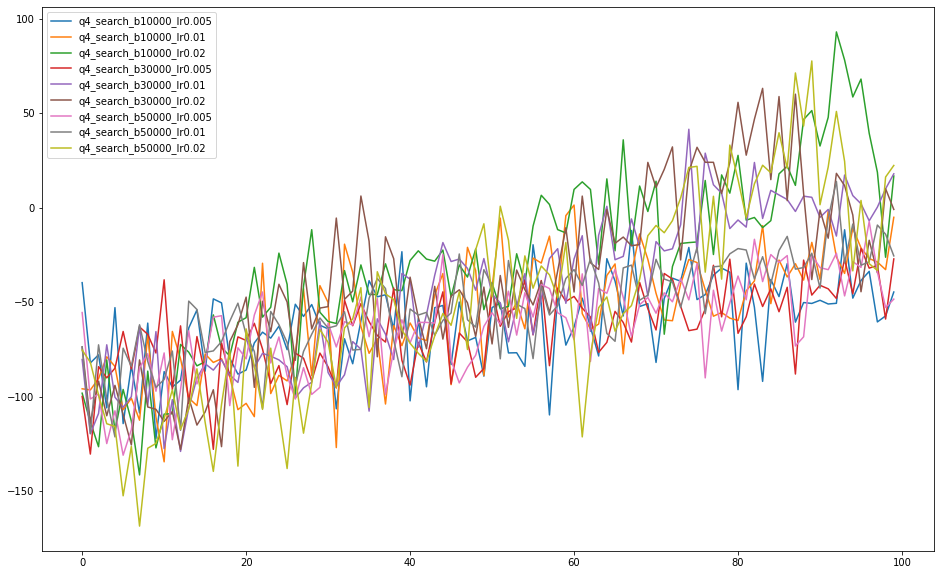

In [36]:
logs = [ 
        '/content/cds_rl_2022/hw2/run_logs/q4_search_b10000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_28-05-2022_20-20-15/events.out.tfevents.1653769216.c1d98fae80ed',
        '/content/cds_rl_2022/hw2/run_logs/q4_search_b10000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_28-05-2022_20-37-59/events.out.tfevents.1653770279.c1d98fae80ed',
        '/content/cds_rl_2022/hw2/run_logs/q4_search_b10000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_28-05-2022_20-55-04/events.out.tfevents.1653771304.c1d98fae80ed',
        '/content/cds_rl_2022/hw2/run_logs/q4_search_b30000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_28-05-2022_21-12-04/events.out.tfevents.1653772324.c1d98fae80ed',
        '/content/cds_rl_2022/hw2/run_logs/q4_search_b30000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_29-05-2022_06-31-55/events.out.tfevents.1653805915.b7d960ad0869',
        '/content/cds_rl_2022/hw2/run_logs/q4_search_b30000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_29-05-2022_06-58-27/events.out.tfevents.1653807507.b7d960ad0869',
        '/content/cds_rl_2022/hw2/run_logs/q4_search_b50000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_29-05-2022_07-44-08/events.out.tfevents.1653810248.b7d960ad0869',
        '/content/cds_rl_2022/hw2/run_logs/q4_search_b50000_lr0.01_rtg_nnbaseline_HalfCheetah-v2_29-05-2022_08-30-53/events.out.tfevents.1653813053.b7d960ad0869',
        '/content/cds_rl_2022/hw2/run_logs/q4_search_b50000_lr0.02_rtg_nnbaseline_HalfCheetah-v2_29-05-2022_09-19-29/events.out.tfevents.1653815969.b7d960ad0869'
]

returns = []
for log in logs:
    returns.append(read_logs(log, 'Eval_AverageReturn'))

plt.figure(figsize = (16,10))

batches = [10000, 30000, 50000]
lrates = [5e-3, 1e-2, 2e-2]
for i in range(len(returns)):
    plt.plot(returns[i], label = 'q4_search_b' + str(batches[int(i/3)]) + '_lr' + str(lrates[i%3]))


plt.legend()
plt.show()

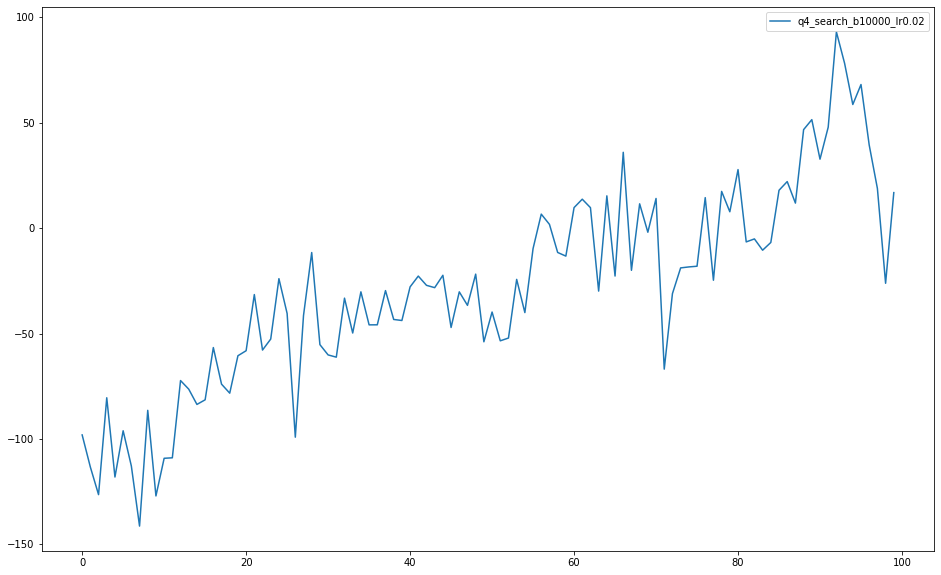

In [35]:
plt.figure(figsize = (16,10))
plt.plot(returns[2], label = 'q4_search_b10000_lr0.02')
plt.legend()
plt.show()

### Выводы:
- Слишком большом размер батча и слишком маленький learning rate замедляют скорость обучения

Оптимальные параметры:
- batch_size = 10000
- learning_rate = 0.02

In [37]:
#    --env_name HalfCheetah-v2 --ep_len 150 \
#    --discount 0.95 -n 100 -l 2 -s 32 \
#    -b <b*> -lr <r*> \
#   --exp_name q4_b<b*>_r<r*>


args = Args()
args.env_name = 'HalfCheetah-v2'
args.ep_len = 150
args.discount = 0.95
args.n_iter = 100
args.n_layers = 2
args.size = 32
args.batch_size = 10000
args.learning_rate = 1e-2
args.reward_to_go = False
args.nn_baseline = False
args.dont_standardize_advantages = False
args.exp_name = 'q4_b10000_r0.02'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/run_logs/q4_b10000_r0.02_HalfCheetah-v2_29-05-2022_11-24-32
########################
GPU not detected. Defaulting to CPU.


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -114.5616455078125
Eval_StdReturn : 39.02663803100586
Eval_MaxReturn : -64.59254455566406
Eval_MinReturn : -159.8423614501953
Eval_AverageEpLen : 150.0
Train_AverageReturn : -94.85330200195312
Train_StdReturn : 43.457820892333984
Train_MaxReturn : 2.396368980407715
Train_MinReturn : -227.58416748046875
Train_AverageEpLen : 150.0
Train_EnvstepsSoFar : 10050
TimeSinceStart : 6.19861102104187
Training Loss : -4.388317108154297
Initial_DataCollection_AverageReturn : -94.85330200195312
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -132

In [38]:
#    --env_name HalfCheetah-v2 --ep_len 150 \
#    --discount 0.95 -n 100 -l 2 -s 32 \
#    -b <b*> -lr <r*> -rtg \
#    --exp_name q4_b<b*>_r<r*>_rtg


args = Args()
args.env_name = 'HalfCheetah-v2'
args.ep_len = 150
args.discount = 0.95
args.n_iter = 100
args.n_layers = 2
args.size = 32
args.batch_size = 10000
args.learning_rate = 1e-2
args.reward_to_go = True
args.nn_baseline = False
args.dont_standardize_advantages = False
args.exp_name = 'q4_b10000_r0.02_rtg'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/run_logs/q4_b10000_r0.02_rtg_HalfCheetah-v2_29-05-2022_11-35-00
########################
GPU not detected. Defaulting to CPU.


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -65.31136322021484
Eval_StdReturn : 14.350140571594238
Eval_MaxReturn : -51.285133361816406
Eval_MinReturn : -85.02638244628906
Eval_AverageEpLen : 150.0
Train_AverageReturn : -94.85330200195312
Train_StdReturn : 43.457820892333984
Train_MaxReturn : 2.396368980407715
Train_MinReturn : -227.58416748046875
Train_AverageEpLen : 150.0
Train_EnvstepsSoFar : 10050
TimeSinceStart : 6.316618204116821
Training Loss : -54.42132568359375
Initial_DataCollection_AverageReturn : -94.85330200195312
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn

In [39]:
#    --env_name HalfCheetah-v2 --ep_len 150 \
#    --discount 0.95 -n 100 -l 2 -s 32 \
#    -b <b*> -lr <r*> --nn_baseline \
#    --exp_name q4_b<b*>_r<r*>_nnbaseline

args = Args()
args.env_name = 'HalfCheetah-v2'
args.ep_len = 150
args.discount = 0.95
args.n_iter = 100
args.n_layers = 2
args.size = 32
args.batch_size = 10000
args.learning_rate = 1e-2
args.reward_to_go = False
args.nn_baseline = True
args.dont_standardize_advantages = False
args.exp_name = 'q4_b10000_r0.02_nnbaseline'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/run_logs/q4_b10000_r0.02_nnbaseline_HalfCheetah-v2_29-05-2022_11-45-13
########################
GPU not detected. Defaulting to CPU.


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -87.08939361572266
Eval_StdReturn : 4.657290935516357
Eval_MaxReturn : -83.58244323730469
Eval_MinReturn : -93.67106628417969
Eval_AverageEpLen : 150.0
Train_AverageReturn : -96.126220703125
Train_StdReturn : 37.91965866088867
Train_MaxReturn : 0.5148420333862305
Train_MinReturn : -190.54913330078125
Train_AverageEpLen : 150.0
Train_EnvstepsSoFar : 10050
TimeSinceStart : 6.073060512542725
Training Loss : -57.77288055419922
Initial_DataCollection_AverageReturn : -96.126220703125
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageRetur

In [40]:
#    --env_name HalfCheetah-v2 --ep_len 150 \
#    --discount 0.95 -n 100 -l 2 -s 32 \
#    -b <b*> -lr <r*> -rtg --nn_baseline \
#    --exp_name q4_b<b*>_r<r*>_rtg_nnbaseline


args = Args()
args.env_name = 'HalfCheetah-v2'
args.ep_len = 150
args.discount = 0.95
args.n_iter = 100
args.n_layers = 2
args.size = 32
args.batch_size = 10000
args.learning_rate = 1e-2
args.reward_to_go = True
args.nn_baseline = True
args.dont_standardize_advantages = False
args.exp_name = 'q4_b10000_r0.02_rtg_nnbaseline'

args.create_logdir('run_logs')

trainer = PG_Trainer(args)
trainer.run_training_loop()

########################
logging outputs to  /content/cds_rl_2022/hw2/run_logs/q4_b10000_r0.02_rtg_nnbaseline_HalfCheetah-v2_29-05-2022_11-54-58
########################
GPU not detected. Defaulting to CPU.


********** Iteration 0 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -86.68013763427734
Eval_StdReturn : 42.04375457763672
Eval_MaxReturn : -27.25078010559082
Eval_MinReturn : -118.01634979248047
Eval_AverageEpLen : 150.0
Train_AverageReturn : -96.126220703125
Train_StdReturn : 37.91965866088867
Train_MaxReturn : 0.5148420333862305
Train_MinReturn : -190.54913330078125
Train_AverageEpLen : 150.0
Train_EnvstepsSoFar : 10050
TimeSinceStart : 5.930862188339233
Training Loss : -71.55630493164062
Initial_DataCollection_AverageReturn : -96.126220703125
Done logging...




********** Iteration 1 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_Average

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  import sys


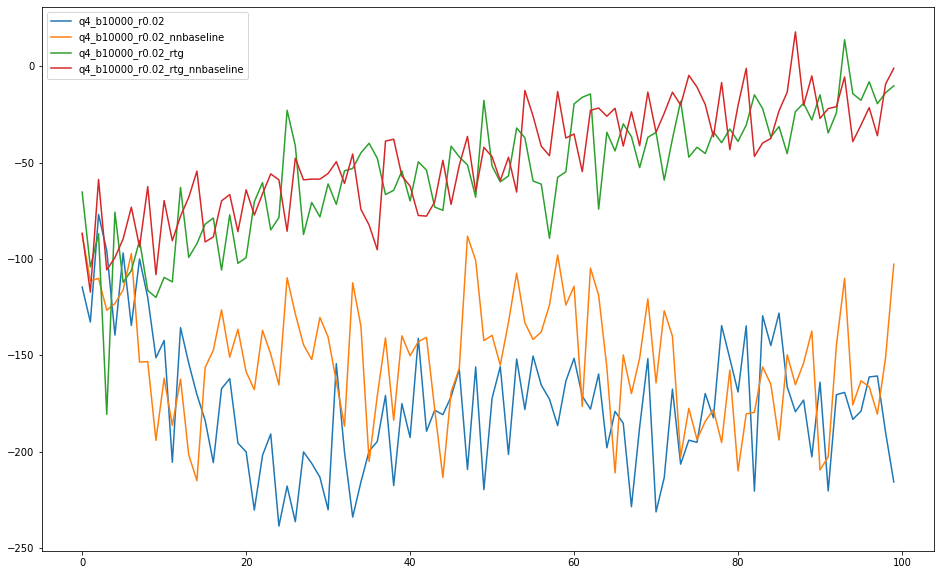

In [42]:
plt.figure(figsize = (16,10))
plt.plot(read_logs('/content/cds_rl_2022/hw2/run_logs/q4_b10000_r0.02_HalfCheetah-v2_29-05-2022_11-24-32/events.out.tfevents.1653823472.b7d960ad0869', 'Eval_AverageReturn'),\
         label = 'q4_b10000_r0.02')
plt.plot(read_logs('/content/cds_rl_2022/hw2/run_logs/q4_b10000_r0.02_nnbaseline_HalfCheetah-v2_29-05-2022_11-45-13/events.out.tfevents.1653824713.b7d960ad0869', 'Eval_AverageReturn'),\
         label = 'q4_b10000_r0.02_nnbaseline')
plt.plot(read_logs('/content/cds_rl_2022/hw2/run_logs/q4_b10000_r0.02_rtg_HalfCheetah-v2_29-05-2022_11-35-00/events.out.tfevents.1653824100.b7d960ad0869', 'Eval_AverageReturn'),\
         label = 'q4_b10000_r0.02_rtg')
plt.plot(read_logs('/content/cds_rl_2022/hw2/run_logs/q4_b10000_r0.02_rtg_nnbaseline_HalfCheetah-v2_29-05-2022_11-54-58/events.out.tfevents.1653825298.b7d960ad0869', 'Eval_AverageReturn'),\
         label = 'q4_b10000_r0.02_rtg_nnbaseline')
plt.legend()
plt.show()

## Experiment 5: Hopper

In [43]:
#    --env_name Hopper-v2 --ep_len 1000
#    --discount 0.99 -n 300 -l 2 -s 32 -b 2000 -lr 0.001 \
#    --reward_to_go --nn_baseline \
#    --action_noise_std 0.5 --gae_lambda <λ> \
#    --exp_name q5_b2000_r0.001_lambda<λ>


args = Args()
args.env_name = 'Hopper-v2'
args.ep_len = 1000
args.discount = 0.99
args.n_iter = 300
args.n_layers = 2
args.size = 32
args.batch_size = 2000
args.learning_rate = 0.001
args.reward_to_go = True
args.nn_baseline = True
args.action_noise_std = 0.5
args.dont_standardize_advantages = False


lambdas = [0, 0.95, 0.99, 1]

for l in lambdas:
  args.gae_lambda = l
  args.exp_name = 'q5_b2000_r0.001_lambda' + str(l)
  args.create_logdir('run_logs')

  trainer = PG_Trainer(args)
  trainer.run_training_loop()

Выходные данные были обрезаны до нескольких последних строк (5000).
Eval_StdReturn : 7.423792362213135
Eval_MaxReturn : 239.11083984375
Eval_MinReturn : 220.67861938476562
Eval_AverageEpLen : 101.5
Train_AverageReturn : 208.2823028564453
Train_StdReturn : 50.02401351928711
Train_MaxReturn : 250.24761962890625
Train_MinReturn : 32.61478042602539
Train_AverageEpLen : 101.5
Train_EnvstepsSoFar : 248713
TimeSinceStart : 229.50285267829895
Training Loss : -30.344078063964844
Initial_DataCollection_AverageReturn : 9.491950988769531
Done logging...




********** Iteration 122 ************


Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 228.8575897216797
Eval_StdReturn : 13.297599792480469
Eval_MaxReturn : 243.8105926513672
Eval_MinReturn : 209.6956787109375
Eval_AverageEpLen : 107.75
Train_AverageReturn : 218.7798309326172
Train_StdReturn : 26.20920181274414
Train_MaxReturn : 252.2912139892578
Train_MinReturn : 126.3442230224609

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


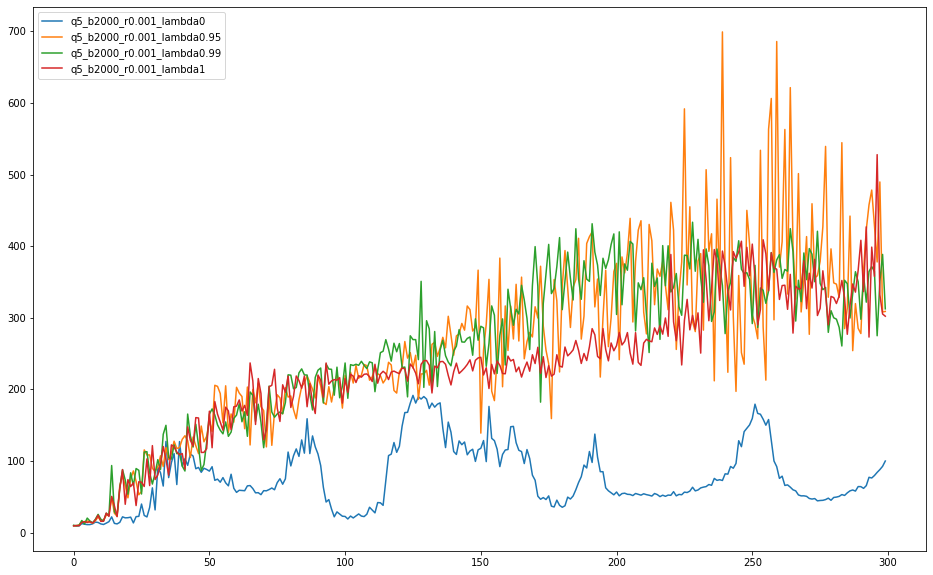

In [53]:
logs = ['/content/cds_rl_2022/hw2/run_logs/q5_b2000_r0.001_lambda0_Hopper-v2_29-05-2022_13-00-31/events.out.tfevents.1653829231.b7d960ad0869',
        '/content/cds_rl_2022/hw2/run_logs/q5_b2000_r0.001_lambda0.95_Hopper-v2_29-05-2022_13-10-22/events.out.tfevents.1653829822.b7d960ad0869',
        '/content/cds_rl_2022/hw2/run_logs/q5_b2000_r0.001_lambda0.99_Hopper-v2_29-05-2022_13-19-56/events.out.tfevents.1653830396.b7d960ad0869',
        '/content/cds_rl_2022/hw2/run_logs/q5_b2000_r0.001_lambda1_Hopper-v2_29-05-2022_13-29-35/events.out.tfevents.1653830975.b7d960ad0869'
       ]

returns = []
for log in logs:
    returns.append(read_logs(log, 'Eval_AverageReturn'))

plt.figure(figsize = (16,10))

lambdas = [0, 0.95, 0.99, 1]
for i in range(len(returns)):
    plt.plot(returns[i], label = 'q5_b2000_r0.001_lambda' + str(lambdas[i]))

plt.legend()
plt.show()

### Выводы:
Наилучший результат наблюдался при $\lambda = 0.95$

In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

%load_ext tensorboard
%tensorboard --logdir /content/cds_rl_2022/hw2/data